# Merging and cleaning geospatial data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
from descartes import PolygonPatch

British Columbia bedrock data was retrieved from [here](https://www2.gov.bc.ca/gov/content/industry/mineral-exploration-mining/british-columbia-geological-survey/geology/bcdigitalgeology).

Ontario bedrock data was retrieved from [here](http://www.geologyontario.mndm.gov.on.ca/mndmaccess/mndm_dir.asp?type=pub&id=MRD126-REV1).

Note: the Ontario data included a 'lowland' Hudson and James Bay bedrock file which upon inspection did not possess the requisite files, so it has been ignored.


In [19]:
bc_data = gpd.read_file('.../British_Columbia_input_files/BC_bedrock_ll83.shp')
on_data = gpd.read_file('.../Ontario_input_files/MRD126-REV1/ShapeFiles/Geology/Geopoly.shp')

## Data Selection

Data selection was determined by visual inspection of the data sets in combination with information on their attributes from [here, Table 3, page 4](http://cmscontent.nrs.gov.bc.ca/geoscience/PublicationCatalogue/OpenFile/BCGS_OF2017-08.pdf) and [here, page 6](http://www.geologyontario.mndm.gov.on.ca/mndmfiles/pub/data/imaging/MRD126-REV1//MRD126-REV1.pdf).

### Age:  
BC : 
   -	The ‘strat_age’ column was selected as it was the most detailed age when compared to the other ('era', 'period') and often contained a combination of the same information as the ‘age_min’ and ‘age_max’ columns.

Ontario: 
   -  The ‘epoch_p’ column was the most similar to the information in BC’s ‘strat_age’ column. Unfortunately, it contained 20616 missing values. Data was populated from first from ‘period_p’ and lastly the ‘era_p’ columns reducing the null values to 6.

### Rock Unit:

BC: 
   -  The ‘strat_name’ column was the most appropriate and specific for the rock unit description. Unfortunately, there are 5594 null values in this category and easily identifiable solution as preformed on Ontario’s ‘epoch_p’ age column. The next candidates, ‘gp_suite’ and ‘fm_lithodm’, contain even more null values. 

Ontario: 
   -  The “strat_p” was selected for the rock unit description, which also has 18582 missing values.

Further research would be needed to fill these values.

### Geological ID:

- BC’s ‘gid’ and Ontario’s ‘geology_id’ were selected. An alternative choice was BC’s ‘upid’ and Ontario’s ‘type_all’ for polygon identification as described in the literature, however without knowing the preferred choice, the ‘geology_id’ columns were selected based on their more similar format.  


### Data processing:

Multiple unnecessary columns are dropped.

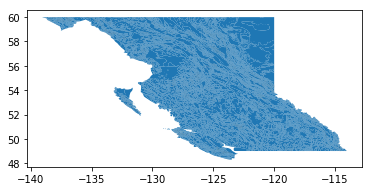

In [20]:
bc_data.plot()

In [3]:
bc_data = bc_data.drop(['upid',
                        'area_m2',
                        'strat_unit',
                        'basin',
                        'basin_age', 
                        'project' , 
                        'src_url',
                        'src_ref_s', 
                        'map_comp', 
                        'belt', 
                        'terrane',
                        'edit_date', 
                        'pub_org',  
                        'gp_suite',
                        'fm_lithodm',
                        'rock_class', 
                        'mem_phase',
                        "rk_char", 
                        'unit_desc',
                        'era', 
                        'period', 
                        'age_min', 
                        'age_max'], axis = 1)


Ontario's 'age' column is populated as described above. Remaining unnecessary columns are dropped.

In [4]:
on_data['EPOCH_P'] = on_data['EPOCH_P'].fillna(on_data['PERIOD_P'])
on_data['EPOCH_P'] = on_data['EPOCH_P'].fillna(on_data['ERA_P'])

on_data = on_data.drop(['AREA', 
                        'PERIMETER', 
                        'GEOLOGY_',
                        'FEATURE',
                        'TYPE_ALL',
                        'TYPE_P',
                        'TYPE_S',
                        'TYPE_T', 
                        'UNITNAME_P',
                        'SUPEREON_P',
                        'PROVINCE_P',
                        'TECTZONE_P',
                        'OROGEN_P', 
                        'PERIOD_P',
                        'ERA_P',
                        'EON_P',
                        'SUT_GAB_P'], axis =1)

on_data = on_data.rename(str.lower, axis ='columns')

A column for each was added with province information (BC or Ontario).

Column names were changed to have an identical format.

In [5]:
bc_data['province'] = 'BC'
on_data["province"] = 'Ontario'
bc_data = bc_data.rename(columns ={'gid': 'geology_id', 
                                   'strat_age': 'age' , 
                                   'strat_name': 'rock_unit'})

on_data = on_data.rename(columns = {'rocktype_p' : 'rock_type' ,
                                    'strat_p' : 'rock_unit',
                                    'epoch_p': 'age'})

Data was repeatly visually inspected and null values tallied (using code such as bc_data[0:50] and on_data.isnull().sum()). These are not included here for visual clarity for the reader.

FInal step was creating one data file.

In [6]:
canada_data = pd.concat([bc_data, on_data], sort= True, ignore_index = True)

### Verifying the Solution 

The solution is verified by visual inspection, comparing the length of the data sets, as well as their plots.

In [7]:
canada_data.head()

,age,geology_id,geometry,province,rock_type,rock_unit
0,Upper Triassic,11674,"POLYGON ((-131.5686180349471 52.8917177240566,...",BC,basaltic volcanic rocks,Vancouver Group - Karmutsen Formation
1,Upper Triassic,32315,POLYGON ((-131.5674722716099 52.89132470861478...,BC,"limestone, marble, calcareous sedimentary rocks",Kunga Group - Sadler Limestone
2,Early Jurassic to Middle Jurassic,11672,POLYGON ((-126.4161456721745 49.95375819935574...,BC,granodioritic intrusive rocks,Island Plutonic Suite
3,Upper Triassic,18951,"POLYGON ((-126.4361695595489 50.0429535918259,...",BC,basaltic volcanic rocks,Vancouver Group - Karmutsen Formation
4,Eocene to Oligocene,11660,POLYGON ((-126.8225860898709 50.02832014989978...,BC,"quartz diorite, feldspar-hornblende dacite por...",Mount Washington Plutonic Suite


In [8]:
canada_data.tail()

,age,geology_id,geometry,province,rock_type,rock_unit
54360,MIDDLE DEVONIAN,13161,POLYGON ((-83.13311012466671 42.18377823070996...,Ontario,"Limestone, dolostone, shale",Detroit River Group; Onondaga Formation
54361,MIDDLE DEVONIAN,13160,POLYGON ((-82.32067198450659 42.14031655854794...,Ontario,"Limestone, dolostone, shale",Dundee Formation
54362,MIDDLE DEVONIAN,13159,POLYGON ((-83.13311012466671 42.18377823070996...,Ontario,"Limestone, dolostone, shale",Dundee Formation
54363,MIDDLE DEVONIAN,13158,"POLYGON ((-82.5558643564918 41.98085102147527,...",Ontario,"Limestone, dolostone, shale",Dundee Formation
54364,MIDDLE DEVONIAN,13157,POLYGON ((-82.68011475042633 41.71488189533546...,Ontario,"Limestone, dolostone, shale",Dundee Formation


In [9]:
print(len(bc_data)+ len(on_data))
len(canada_data)

54365


54365

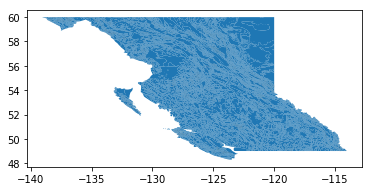

In [15]:
bc_data.plot()

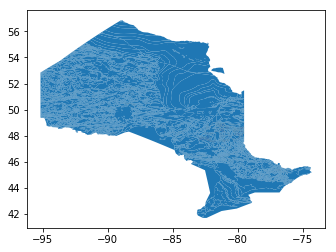

In [11]:
on_data.plot()

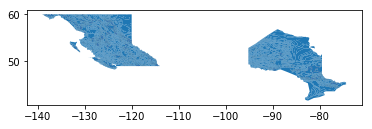

In [12]:
canada_data.plot()

In [16]:
canada_data.to_file("/Users/turtle26mr/Desktop/canada_data.shp")

### Ongoing data issues:
Ongoing data issues:
There are null values in the 'age', 'rock_type' and 'rock_unit'. Further research is needed to properly fill them.

In [14]:
canada_data.isnull().sum()

age               6
geology_id        0
geometry          0
province          0
rock_type        23
rock_unit     24176
dtype: int64